# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

This is a very pivotal step in the process of analyzing data. This involves understanding the problem and making some hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analysis which we can potentially perform if data is available.

#### Possible hypotheses
##### Store Level Hypotheses:

1. City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2. Population Density: Stores located in densely populated areas should have higher sales because of more demand.
3. Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place
4. Competitors: Stores having similar establishments nearby should have less sales because of more competition.
5. Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
6. Location: Stores located within popular marketplaces should have higher sales because of better access to customers.
7. Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.
8. Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

##### Product Level Hypotheses:

1. Brand: Branded products should have higher sales because of higher trust in the customer.
2. Packaging: Products with good packaging can attract customers and sell more.
3. Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.
4. Display Area: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
5. Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
6. Advertising: Better advertising of products in the store will should higher sales in most cases.
7. Promotional Offers: Products accompanied with attractive offers and discounts will sell more.

We can think further and create some of our own. But remember, the data might not be sufficient to test all of these, but forming them enables a better understanding of the problem.

## 2. Data Exploration
Perform some basic data exploration here and come up with some inferences about the data. Try to figure out some irregularities and address them in the next section. 

In [1]:
# import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import xgboost as xgb

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, auc
from sklearn import metrics 
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.tree import export_graphviz

import graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus
import os
import copy
import datetime

%matplotlib inline

In [2]:
#Read files:
data = pd.read_csv("regression_exercise.csv", header=0)
data.shape

(8523, 12)

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


One of the key challenges in any data set is missing values. Lets start by checking which columns contain missing values.

In [4]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Outlet_Size,2410,0.282764
Item_Weight,1463,0.171653
Item_Outlet_Sales,0,0.000000
Outlet_Type,0,0.000000
Outlet_Location_Type,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Identifier,0,0.000000
Item_MRP,0,0.000000
Item_Type,0,0.000000
Item_Visibility,0,0.000000


Look at some basic statistics for numerical variables.

In [7]:
numerical = list(data.dtypes[data.dtypes != 'object'].index)
categorical = list(data.dtypes[data.dtypes == 'object'].index)

In [8]:
data[numerical].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Outlet_Sales'>

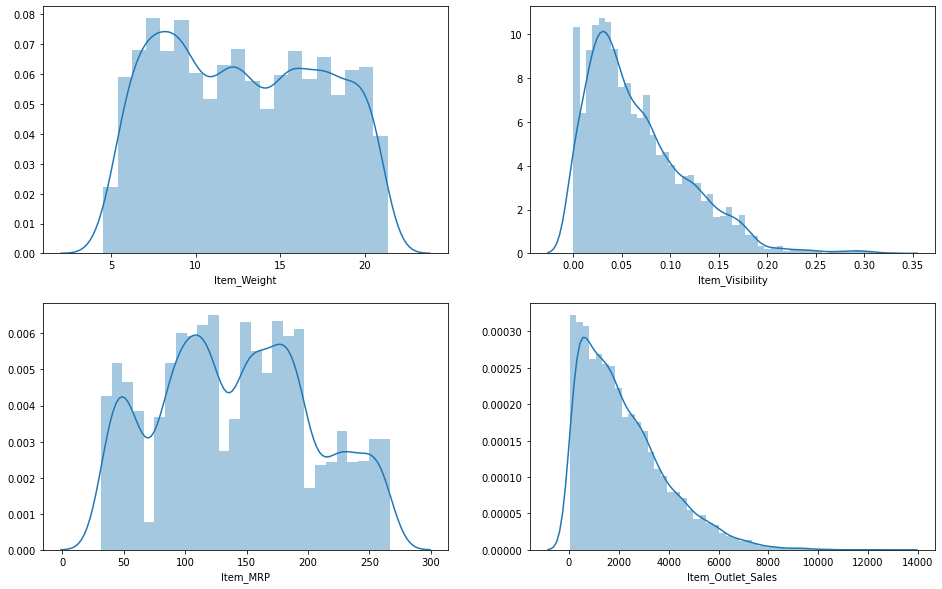

In [9]:
fig, ax = plt.subplots(2,2, figsize=(16,10))

sns.distplot(data['Item_Weight'], ax = ax[0][0])
sns.distplot(data['Item_Visibility'], ax = ax[0][1])
sns.distplot(data['Item_MRP'], ax = ax[1][0])
sns.distplot(data['Item_Outlet_Sales'], ax = ax[1][1])

Make some observations:

Do min, max values make sense?

Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

How many products are there, how many stores, item types?

Explore the numbers of each categorical variable

In [10]:
data[categorical].describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


Observe the output:

Tipp: look at the unique values of `Item_Fat_Content`


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

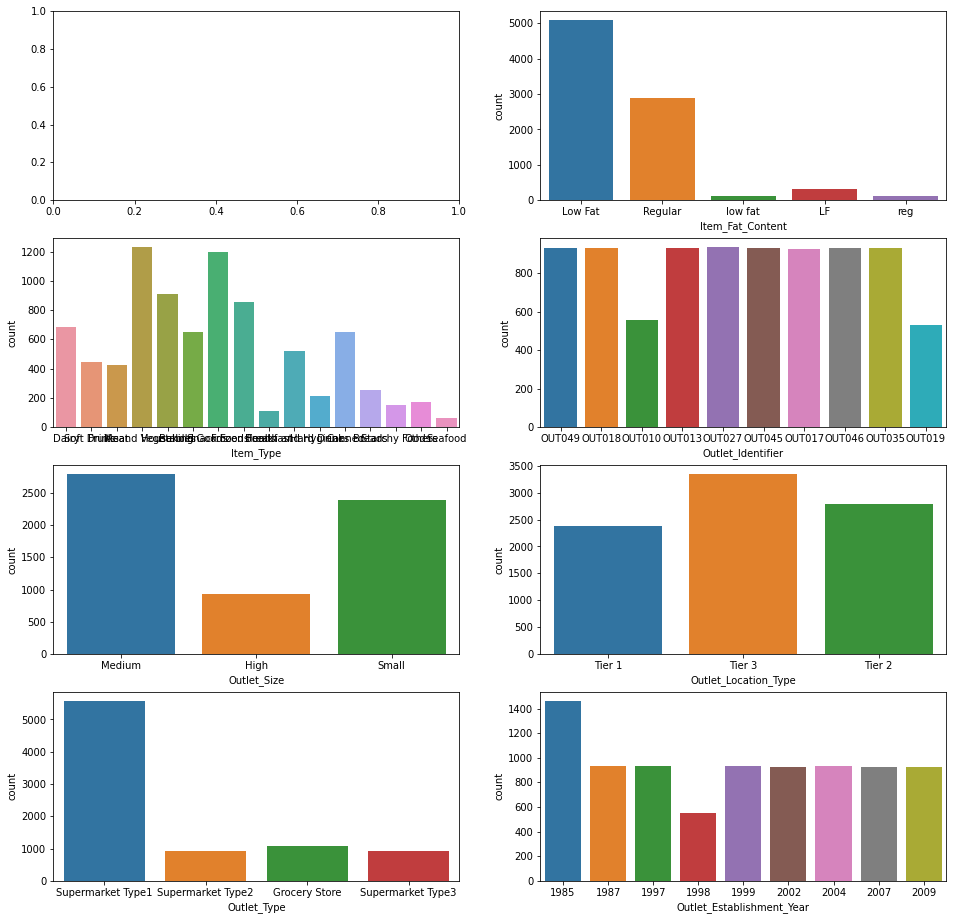

In [11]:
fig, ax = plt.subplots(4,2, figsize=(16,16))

#sns.countplot(data['Item_Identifier'], ax = ax[0][0])
sns.countplot(data['Item_Fat_Content'], ax = ax[0][1])
sns.countplot(data['Item_Type'], ax = ax[1][0])
sns.countplot(data['Outlet_Identifier'], ax = ax[1][1])
sns.countplot(data['Outlet_Size'], ax = ax[2][0])
sns.countplot(data['Outlet_Location_Type'], ax = ax[2][1])
sns.countplot(data['Outlet_Type'], ax = ax[3][0])
sns.countplot(data['Outlet_Establishment_Year'], ax = ax[3][1])

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Which variables have missing values? How can you fill those values? Think of some suitalbe strategy (zero filling, mean, median values. Maybe mean values per `Item_Type`?)



In [12]:
# impute NA weight with mean from each Item_Type
data["Item_Weight"] = data["Item_Weight"].fillna(data.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [13]:
# impute NA outlet size with mean from each Item_Type
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]
data = data.fillna(data.groupby('Outlet_Location_Type').transform(f))

Check if there are no more missing values

In [14]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Item_Outlet_Sales,0,0.0
Outlet_Type,0,0.0
Outlet_Location_Type,0,0.0
Outlet_Size,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Identifier,0,0.0
Item_MRP,0,0.0
Item_Type,0,0.0
Item_Visibility,0,0.0
Item_Fat_Content,0,0.0


## 4. Feature Engineering

1. Resolving the issues in the data to make it ready for the analysis.
2. Create some new variables using the existing ones.





In [15]:
data_FE = copy.deepcopy(data)

In [16]:
data_FE.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
# binning Super Market type
data_FE['outlet_type'] = np.where(data_FE['Outlet_Type'] == 'Supermarket Type1',1, 0)

In [18]:
# grouping Item_Fat_Content
# low fat = 0, regular = 1, later on 2 = no fat
low_fat = ['Low Fat','low fat', 'LF']
data_FE['item_fat_content'] = np.where(np.isin(data_FE['Item_Fat_Content'],low_fat),0,1)

In [19]:
data_FE.drop(['Outlet_Type','Item_Fat_Content'], axis = 1, inplace = True)

In [20]:
data_FE.shape

(8523, 12)

### Create a broad category of Type of Item

Item_Type variable has many categories which might prove to be very useful in analysis. Look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. Use the Item_Identifier variable to create a new column

In [21]:
# 0 = food, 1 = drink, 2 = non-consumables
data_FE['item_category'] = np.where(data_FE['Item_Identifier'].str[:2] == 'FD',0,data_FE['Item_Identifier'])
data_FE['item_category'] = np.where(data_FE['Item_Identifier'].str[:2] == 'DR',1,data_FE['item_category'])
data_FE['item_category'] = np.where(data_FE['Item_Identifier'].str[:2] == 'NC',2,data_FE['item_category'])

### Determine the years of operation of a store

Make a new column depicting the years of operation of a store (i.e. how long the store exists). 

In [22]:
data_FE['year_operated'] = datetime.datetime.now().year - data_FE['Outlet_Establishment_Year']

### Modify categories of Item_Fat_Content

There are difference in representation in categories of Item_Fat_Content variable. This should be corrected.

In [23]:
# done above

There are some non-consumables as well and a fat-content should not be specified for them. Create a separate category for such kind of observations.

In [24]:
data_FE['item_fat_content'] = np.where(data_FE['item_category'] == 2,2,data_FE['item_fat_content'])

### Numerical and One-Hot Coding of Categorical variables

Since scikit-learn accepts only numerical variables, convert all categories of nominal variables into numeric types. Created a new variable ‘Outlet’ same as Outlet_Identifier and code that too. O

Encode all categorical variables as numeric using `LabelEncoder` from sklearn’s preprocessing module.

In [25]:
data_FE_drop = copy.deepcopy(data_FE)

In [26]:
data_FE_drop

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,outlet_type,item_fat_content,item_category,year_operated
0,FDA15,9.300,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,3735.1380,1,0,0,21
1,DRC01,5.920,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,443.4228,0,1,1,11
2,FDN15,17.500,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,2097.2700,1,0,0,21
3,FDX07,19.200,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,732.3800,0,1,0,22
4,NCD19,8.930,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,994.7052,1,2,2,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,2778.3834,1,0,0,33
8519,FDS36,8.380,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,549.2850,1,1,0,18
8520,NCJ29,10.600,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,1193.1136,1,2,2,16
8521,FDN46,7.210,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,1845.5976,0,1,0,11


In [27]:
categorical = ['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type']

In [28]:
data_FE_drop[categorical] = data_FE_drop[categorical].apply(preprocessing.LabelEncoder().fit_transform)
data_FE_drop

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,outlet_type,item_fat_content,item_category,year_operated
0,156,9.300,0.016047,4,249.8092,9,1999,1,0,3735.1380,1,0,0,21
1,8,5.920,0.019278,14,48.2692,3,2009,1,2,443.4228,0,1,1,11
2,662,17.500,0.016760,10,141.6180,9,1999,1,0,2097.2700,1,0,0,21
3,1121,19.200,0.000000,6,182.0950,0,1998,1,2,732.3800,0,1,0,22
4,1297,8.930,0.000000,9,53.8614,1,1987,0,2,994.7052,1,2,2,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,13,214.5218,1,1987,0,2,2778.3834,1,0,0,33
8519,897,8.380,0.046982,0,108.1570,7,2002,2,1,549.2850,1,1,0,18
8520,1357,10.600,0.035186,8,85.1224,6,2004,2,1,1193.1136,1,2,2,16
8521,681,7.210,0.145221,13,103.1332,3,2009,1,2,1845.5976,0,1,0,11


One-Hot-Coding refers to creating dummy variables, one for each category of a categorical variable. For example, the Item_Fat_Content has 3 categories – ‘Low Fat’, ‘Regular’ and ‘Non-Edible’. One hot coding will remove this variable and generate 3 new variables. Each will have binary numbers – 0 (if the category is not present) and 1(if category is present). This can be done using `get_dummies` function of Pandas.

In [29]:
# not going to use this method :P

All variables are now float and each category has a new variable. 

Notice that each row will have only one of the columns as 1 corresponding to the category in the original variable.

### Exporting Data
you can save the processed data to disk

In [30]:
data_FE_drop.to_csv('data_cleaned.csv')

In [89]:
data_FE_drop

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,outlet_type,item_fat_content,item_category,year_operated
0,156,9.300,0.016047,4,249.8092,9,1999,1,0,3735.1380,1,0,0,21
1,8,5.920,0.019278,14,48.2692,3,2009,1,2,443.4228,0,1,1,11
2,662,17.500,0.016760,10,141.6180,9,1999,1,0,2097.2700,1,0,0,21
3,1121,19.200,0.000000,6,182.0950,0,1998,1,2,732.3800,0,1,0,22
4,1297,8.930,0.000000,9,53.8614,1,1987,0,2,994.7052,1,2,2,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,13,214.5218,1,1987,0,2,2778.3834,1,0,0,33
8519,897,8.380,0.046982,0,108.1570,7,2002,2,1,549.2850,1,1,0,18
8520,1357,10.600,0.035186,8,85.1224,6,2004,2,1,1193.1136,1,2,2,16
8521,681,7.210,0.145221,13,103.1332,3,2009,1,2,1845.5976,0,1,0,11


## Model Building

Its time to start making predictive models.

Make a baseline model. Baseline model is the one which requires no predictive model and its like an informed guess. For instance, predict the sales as the overall average sales or just zero.
Making baseline models helps in setting a benchmark. If your predictive algorithm is below this, there is something going seriously wrong and you should check your data.

Split your data in 80% train set and 20% test set.
Train the model in the training set and score the model using different evaluation metrics on the test set


In [35]:
data_FE_drop['item_category'] = data_FE_drop['item_category'].astype(int)

In [36]:
#Define target
features = data_FE_drop.drop('Item_Outlet_Sales', axis = 1)
target = data_FE_drop['Item_Outlet_Sales']

In [37]:
features.drop(['Outlet_Establishment_Year'], axis = 1, inplace = True)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123)

In [39]:
baseline = np.mean(y_train)

In [40]:
baseline

2173.31360040228

In [41]:
# root mean squared error
(sum((y_test - baseline)**2)/len(y_test))**(1/2)

1738.1821391272804

### Ensemble Models

Try different  ensemble models (Random Forest Regressor, Gradient Boosting, XGBoost)

Calculate the mean squared error on the test set. Explore how different parameters of the model affect the results and the performance of the model

- Use GridSearchCV to find optimal paramaters of models.

## Random Forest Regressor

In [76]:
regr = RandomForestRegressor(random_state=0)

In [77]:
regr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [78]:
y_pred = regr.predict(x_test)

In [79]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1150.4065718395068

### hyperparameter tuning

In [ ]:
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#min_samples_split = [2, 5, 10]
#min_samples_leaf = [1, 2, 4]
#bootstrap = [True, False]

#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

In [68]:
# trees based on problem
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1500, num = 50)]
# Max depth should never exceed 10
max_depth = [int(x) for x in np.linspace(3, 7, num = 5)]
# 5 < cross validation < 10
n_folds = 5

In [69]:
random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth,}

In [70]:
rf = RandomForestRegressor()
rg_gs = GridSearchCV(rf, random_grid, cv = n_folds, n_jobs = -1)

In [71]:
rg_gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [400, 422, 444, 467, 489, 512, 534,
                                          557, 579, 602, 624, 646, 669, 691,
                                          714, 736, 759, 781, 804, 826, 848,
                                          871, 893, 916, 938, 961, 983, 1006,
                                          1028, 1051, ...]})

In [72]:
print(rg_gs.best_params_)
print(rg_gs.best_score_)

{'max_depth': 6, 'n_estimators': 781}
0.5914908310621282


### trying with optimal hyper-param

In [80]:
regr = RandomForestRegressor(n_estimators = 781, max_depth = 10,random_state=0)

In [81]:
regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=781, random_state=0)

In [82]:
y_pred = regr.predict(x_test)

In [84]:
# was 1107.622 with max_depth = 10, n_esti = 600
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1107.3042581724844

In [86]:
regr.score(x_test,y_test)

0.5940757779573431

In [ ]:
# errormacy < 10

In [ ]:
# 0.03 or 0.05 or less than 0.1

# XGBOOST

In [50]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [51]:
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

1654.5947883814533

### Using grid search

In [250]:
n_folds = 10
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4]}
param_comb = 5

In [251]:
xgb_hyper = xgb.XGBRegressor(nthread=-1)

In [252]:
grid = GridSearchCV(xgb_hyper, params, n_jobs = -1)
grid.fit(x_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None, nthread=-1,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=

In [253]:
print(grid.best_params_)
print(grid.best_score_)

{'colsample_bytree': 0.9, 'gamma': 0.3, 'max_depth': 2, 'min_child_weight': 4, 'subsample': 1.0}
0.5679745930286321


### trying with optimal hyper-param

In [53]:
xgb_hyper = xgb.XGBRegressor(colsample_bytree= 0.9, gamma= 0.3, max_depth= 2, min_child_weight= 4, subsample= 1.0)

In [54]:
xgb_hyper.fit(x_train,y_train)
preds = xgb_hyper.predict(x_test)

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

1115.5258136613147

# Markdown $\alpha^2$